# 3. TFIDF W2V 





In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [0]:
# a = []
# while(1):
#     a.append(1)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# avoid decoding problems
df = pd.read_csv("/content/drive/My Drive/qqps/train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [0]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('/content/drive/My Drive/qqps/nlp_features_train.csv'):
    dfnlp = pd.read_csv("/content/drive/My Drive/qqps/nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('/content/drive/My Drive/qqps/df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("/content/drive/My Drive/qqps/df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [0]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','is_duplicate'],axis=1)
#df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
#df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [0]:
# dataframe of nlp features
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [0]:
# data before preprocessing 
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:
df3.head()

,id,question1,question2
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [0]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3.shape[1])
# print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 3
Number of features in final dataframe  : 32


In [0]:
dff = df1.merge(df2, on='id',how='left')
dff = df3.merge(dff, on='id',how='left')

In [0]:
dff.shape

(404290, 30)

In [0]:
dff.head(2)

,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


### 3.1 Random train test split( 70:30)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [0]:
#dff_sampled = dff.sample(n=100000)
#X = dff_sampled.drop('is_duplicate',axis=1)
#y_true = dff_sampled['is_duplicate']

X = dff.drop('is_duplicate',axis=1)
y_true = dff['is_duplicate']

print(X.shape)
print(y_true.shape)

(404290, 29)
(404290,)


In [0]:
X.head(2)

,id,question1,question2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y_true, stratify=y_true, test_size=0.3)

### 3.2 Featurizing text data with TFIDF W2V

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(X_train['question1']) + list(X_train['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics. 

In [0]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1_train = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_train['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1_train.append(mean_vec1)
# df['q1_feats_m'] = list(vecs1)


100%|██████████| 283003/283003 [44:16<00:00, 106.53it/s]


In [0]:
vecs2_train = []
for qu2 in tqdm(list(X_train['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2_train.append(mean_vec2)
# df['q2_feats_m'] = list(vecs2)

100%|██████████| 283003/283003 [45:06<00:00, 104.56it/s]


In [0]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1_test = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_test['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1_test.append(mean_vec1)
# df['q1_feats_m'] = list(vecs1)


100%|██████████| 121287/121287 [19:00<00:00, 106.32it/s]


In [0]:
vecs2_test = []
for qu2 in tqdm(list(X_test['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2_test.append(mean_vec2)
# df['q2_feats_m'] = list(vecs2)

100%|██████████| 121287/121287 [18:44<00:00, 107.83it/s]


In [0]:
type(vecs1_train)

list

In [0]:
q1_tfidfw2v_train_df = pd.DataFrame(vecs1_train)
q1_tfidfw2v_train_df = q1_tfidfw2v_train_df.fillna(0)

q2_tfidfw2v_train_df = pd.DataFrame(vecs2_train)
q2_tfidfw2v_train_df = q2_tfidfw2v_train_df.fillna(0)

q1_tfidfw2v_test_df = pd.DataFrame(vecs1_test) 
q1_tfidfw2v_test_df = q1_tfidfw2v_test_df.fillna(0)

q2_tfidfw2v_test_df = pd.DataFrame(vecs2_test) 
q2_tfidfw2v_test_df = q2_tfidfw2v_test_df.fillna(0)

In [0]:
q1_tfidfw2v_train_df['id']=X_train['id']
q2_tfidfw2v_train_df['id']=X_train['id']
q1_tfidfw2v_test_df['id']=X_test['id']
q2_tfidfw2v_test_df['id']=X_test['id']

In [0]:
X_train_tfidfw2v = X_train.merge(q1_tfidfw2v_train_df, on='id',how='left')
X_train_tfidfw2v = X_train_tfidfw2v.merge(q2_tfidfw2v_train_df, on='id',how='left')

X_test_tfidfw2v = X_test.merge(q1_tfidfw2v_test_df, on='id',how='left')
X_test_tfidfw2v = X_test_tfidfw2v.merge(q2_tfidfw2v_test_df, on='id',how='left')

In [0]:
X_train_tfidfw2v = X_train_tfidfw2v.fillna(0)
X_test_tfidfw2v = X_test_tfidfw2v.fillna(0)

In [0]:
X_train_tfidfw2v = X_train_tfidfw2v.drop(['question1','question2'],axis=1)
X_test_tfidfw2v = X_test_tfidfw2v.drop(['question1','question2'],axis=1)

In [0]:
print(X_train_tfidfw2v.shape)
print(X_test_tfidfw2v.shape)

(283003, 219)
(121287, 219)


In [0]:
X_train_tfidfw2v.head(2)

,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,402501,0.714276,0.624992,0.749981,0.599988,0.727266,0.571424,0.0,1.0,3.0,12.5,82,76,72,69,0.426471,4,7,83,65,12,10,7.0,22.0,0.318182,11,3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
1,212709,0.599988,0.499992,0.999980,0.714276,0.799992,0.615380,1.0,1.0,3.0,11.5,85,67,72,60,0.274510,5,4,75,50,13,10,8.0,23.0,0.347826,9,1,111.434554,-225.00761,-150.657731,-208.897756,-10.436873,19.682463,262.707818,35.196698,19.537061,92.673827,35.930772,40.450104,-131.673889,...,-35.618016,119.35999,-136.177729,100.831392,4.58462,-85.915894,-4.206022,41.09576,13.954815,24.149359,20.281964,10.292116,-91.667022,82.317786,32.783072,-43.189971,-16.351201,20.561116,33.273871,89.062332,-14.71115,2.15307,13.313856,39.210896,53.950338,-11.26187,-125.887256,15.390348,-57.160231,-87.743426,198.94356,-62.949797,2.824495,76.278428,67.1854,30.259046,-64.616903,44.010895,-114.076862,-10.381497


In [0]:
X_test_tfidfw2v.head(2)

,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,113755,0.874989,0.874989,0.999983,0.999983,0.928565,0.928565,0.0,1.0,0.0,14.0,96,92,96,95,0.913580,4,1,80,81,14,14,13.0,28.0,0.464286,5,3,103.923637,-35.989789,-51.271691,-83.837261,-55.745899,-54.127919,95.702778,79.344495,-22.614627,51.464426,-41.724352,-48.535597,-94.297173,...,104.529365,-0.831035,-173.668709,30.084574,5.87329,8.337711,18.120971,-66.785587,18.31628,36.183876,43.431479,-2.655021,13.708967,52.254463,16.037837,-50.224871,-63.355928,199.409421,-16.813476,7.506533,-54.455068,-60.919389,66.714602,-59.792312,49.619057,20.512666,-200.824042,143.391984,-39.620633,94.576085,66.384932,17.484414,63.706162,73.244424,64.621352,-7.469189,-18.475727,30.108276,-76.996616,72.607268
1,365279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.0,11.0,19,18,21,30,0.052632,13,4,56,79,8,14,0.0,21.0,0.000000,17,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

### 3.3 Building a random model (Finding worst-case log-loss) 

Log loss on Test Data using Random Model 0.8887162780872625


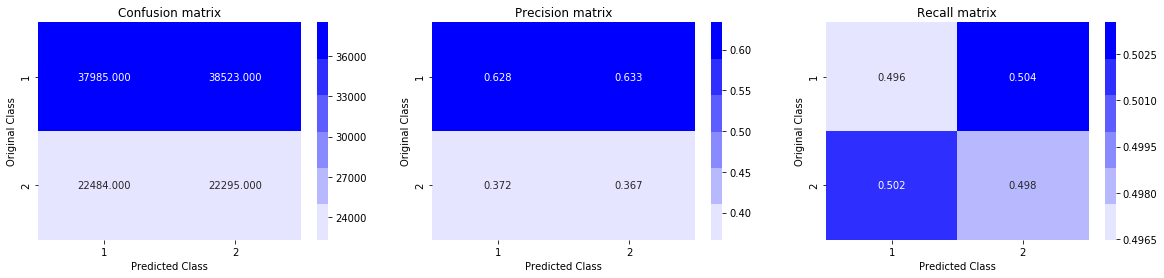

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

### 3.4 Logistic Regression with hyperparameter tuning



For values of alpha =  1e-05 The log loss is: 0.6585278256347589
For values of alpha =  0.0001 The log loss is: 0.6585278256347589
For values of alpha =  0.001 The log loss is: 0.6585278256347589
For values of alpha =  0.01 The log loss is: 0.6585278256347589
For values of alpha =  0.1 The log loss is: 0.6447398098588599
For values of alpha =  1 The log loss is: 0.6348496347523985
For values of alpha =  10 The log loss is: 0.5941716050926925


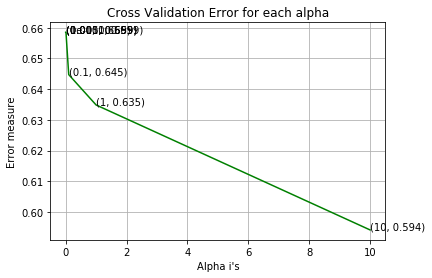

For values of best alpha =  10 The train log loss is: 0.5922424445697081
For values of best alpha =  10 The test log loss is: 0.5941716050926925
Total number of data points : 121287


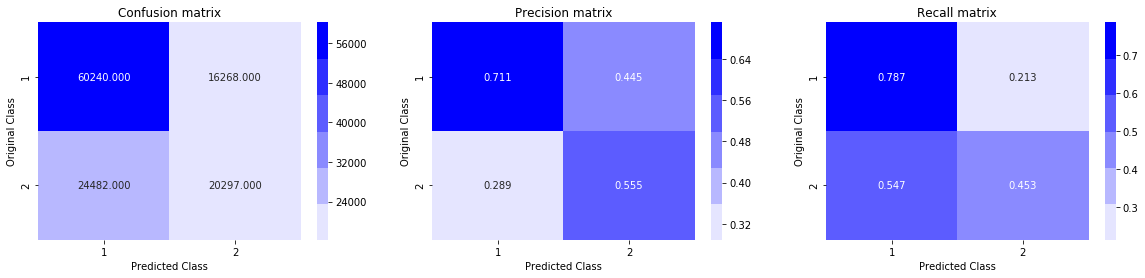

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,n_jobs=-1)
    clf.fit(X_train_tfidfw2v, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidfw2v, y_train)
    predict_y = sig_clf.predict_proba(X_test_tfidfw2v)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_tfidfw2v, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidfw2v, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidfw2v)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidfw2v)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### 3.5 Linear SVM with hyperparameter tuning 

For values of alpha =  1e-05 The log loss is: 0.6585278256347589
For values of alpha =  0.0001 The log loss is: 0.6585278256347589
For values of alpha =  0.001 The log loss is: 0.6585278256347589
For values of alpha =  0.01 The log loss is: 0.6585278256347589
For values of alpha =  0.1 The log loss is: 0.6585278256347589
For values of alpha =  1 The log loss is: 0.6585278256347589
For values of alpha =  10 The log loss is: 0.655087920478348


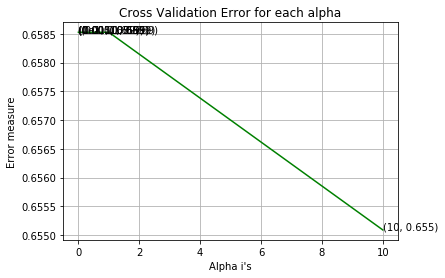

For values of best alpha =  10 The train log loss is: 0.6557461044790134
For values of best alpha =  10 The test log loss is: 0.655087920478348
Total number of data points : 121287


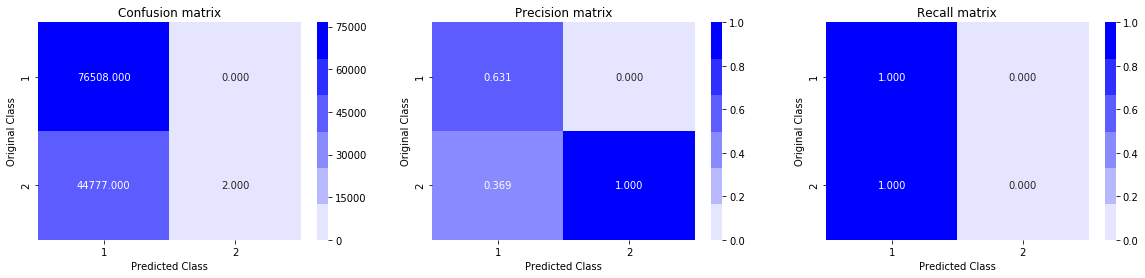

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42,n_jobs=-1)
    clf.fit(X_train_tfidfw2v, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidfw2v, y_train)
    predict_y = sig_clf.predict_proba(X_test_tfidfw2v)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train_tfidfw2v, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidfw2v, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidfw2v)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidfw2v)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### 3.6 XGBoost 

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


 
tuned_parameters = {'max_depth':[2,5,7,10],'n_estimators':[10,50,100,500]}

clf_gb = XGBClassifier(objective='binary:logistic', eval_metric='logloss',n_jobs=-1)

 

#Using RandomSearchCV
model_tfidfw2v = RandomizedSearchCV(clf_gb, tuned_parameters,verbose=5,n_jobs=10)
model_tfidfw2v.fit(X_train_tfidfw2v, y_train)

 

print(model_tfidfw2v.best_estimator_)
print(model_tfidfw2v.score(X_train_tfidfw2v, y_train))


 




Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  18 out of  30 | elapsed: 58.4min remaining: 39.0min
[Parallel(n_jobs=10)]: Done  25 out of  30 | elapsed: 90.5min remaining: 18.1min
[Parallel(n_jobs=10)]: Done  30 out of  30 | elapsed: 100.4min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8724395147754618


In [0]:
print(model_tfidfw2v.best_estimator_)
print(model_tfidfw2v.score(X_test_tfidfw2v, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8328757410109905


In [0]:
print('optimal max_depth:10')
print('optimal n_estimators:100')


optimal max_depth:10
optimal n_estimators:100


In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 10
params['n_estimators'] = 100

d_train = xgb.DMatrix(X_train_tfidfw2v, label=y_train)
d_test = xgb.DMatrix(X_test_tfidfw2v, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train_tfidfw2v,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

[0]	train-logloss:0.682592	valid-logloss:0.682864
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.596266	valid-logloss:0.599114
[20]	train-logloss:0.534559	valid-logloss:0.539765
[30]	train-logloss:0.488898	valid-logloss:0.496228
[40]	train-logloss:0.453819	valid-logloss:0.463194
[50]	train-logloss:0.426552	valid-logloss:0.437859
[60]	train-logloss:0.405104	valid-logloss:0.418226
[70]	train-logloss:0.3881	valid-logloss:0.4028
[80]	train-logloss:0.37424	valid-logloss:0.390549
[90]	train-logloss:0.362689	valid-logloss:0.380593
[100]	train-logloss:0.35305	valid-logloss:0.372372
[110]	train-logloss:0.345021	valid-logloss:0.365723
[120]	train-logloss:0.338514	valid-logloss:0.360496
[130]	train-logloss:0.333071	valid-logloss:0.35633
[140]	train-logloss:0.328545	valid-logloss:0.352976
[150]	train-logloss:0.324543	valid-logloss:0.35014
[160]	train-logloss:0.321081	valid-l

Total number of data points : 121287


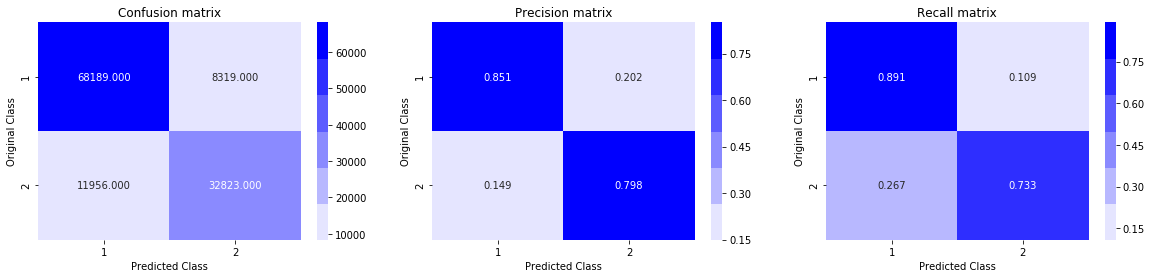

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# 4. TFIDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# merge texts
questions = list(X_train['question1']) + list(X_train['question2'])


tfidf = TfidfVectorizer(min_df=5)
tfidf.fit(questions)

q1_train_tfidf = tfidf.transform(X_train['question1'].values)
q2_train_tfidf = tfidf.transform(X_train['question2'].values)

q1_test_tfidf = tfidf.transform(X_test['question1'].values)
q2_test_tfidf = tfidf.transform(X_test['question2'].values)


# # dict key:word and value:tf-idf score
# word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

print("After vectorizations")
print(q1_train_tfidf.shape)
print(q2_train_tfidf.shape)
print(q1_test_tfidf.shape)
print(q2_test_tfidf.shape)

print(tfidf.get_feature_names())

After vectorizations
(283003, 25458)
(283003, 25458)
(121287, 25458)
(121287, 25458)
['00', '000', '00am', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0s', '10', '100', '1000', '10000', '100000', '10000inr', '1000rs', '1000s', '100cc', '100k', '100m', '100mbps', '100w', '101', '102', '1024', '103', '104', '105', '1050', '106', '1060', '107', '1070', '108', '1080', '1080i', '1080p', '109', '1099', '10cgpa', '10k', '10kg', '10m', '10mg', '10th', '10x', '11', '110', '1100', '110v', '111', '1112', '112', '113', '114', '115', '117', '119', '11g', '11kv', '11th', '12', '120', '1200', '12000', '1200d', '120k', '120v', '121', '122', '123', '124', '125', '125cc', '126', '127', '128', '128gb', '129', '12c', '12k', '12pm', '12th', '12v', '13', '130', '1300', '13000', '1300d', '130k', '1337', '135', '1361', '137', '13k', '13th', '14', '140', '1400', '14000', '140k', '141', '142', '144', '145', '147', '148', '149', '14days', '14th', '15', '150', '1500', '15000', '150cc', '150k', '150r', 

In [0]:
X_train_df = X_train.drop(['question1','question2'],axis=1)
X_test_df = X_test.drop(['question1','question2'],axis=1)

In [0]:
import scipy
X_train_sparse = scipy.sparse.csr_matrix(X_train_df)
print(X_train_df.shape)
print(X_train_sparse.shape)

(283003, 27)
(283003, 27)


In [0]:
from scipy.sparse import hstack

X_train_tfidf = hstack((X_train_sparse,q1_train_tfidf,q2_train_tfidf))
X_train_tfidf.shape


(283003, 50943)

In [0]:
import scipy
X_test_sparse = scipy.sparse.csr_matrix(X_test_df)
print(X_test_df.shape)
print(X_test_sparse.shape)

(121287, 27)
(121287, 27)


In [0]:
from scipy.sparse import hstack

X_test_tfidf = hstack((X_test_sparse,q1_test_tfidf,q2_test_tfidf))
X_test_tfidf.shape


(121287, 50943)

In [0]:
# q1_tfidf_train_df = pd.DataFrame(q1_train_tfidf)
# q1_tfidf_train_df = q1_tfidf_train_df.fillna(0)

# q2_tfidf_train_df = pd.DataFrame(q2_train_tfidf)
# q2_tfidf_train_df = q2_tfidf_train_df.fillna(0)

# q1_tfidf_test_df = pd.DataFrame(q1_test_tfidf) 
# q1_tfidf_test_df = q1_tfidf_test_df.fillna(0)

# q2_tfidf_test_df = pd.DataFrame(q2_test_tfidf) 
# q2_tfidf_test_df = q2_tfidf_test_df.fillna(0)

In [0]:
# q1_tfidf_train_df['id']=X_train['id']
# q2_tfidf_train_df['id']=X_train['id']
# q1_tfidf_test_df['id']=X_test['id']
# q2_tfidf_test_df['id']=X_test['id']

In [0]:
# X_train_tfidf = X_train.merge(q1_tfidf_train_df, on='id',how='left')
# X_train_tfidf = X_train_tfidf.merge(q2_tfidf_train_df, on='id',how='left')

# X_test_tfidf = X_test.merge(q1_tfidf_test_df, on='id',how='left')
# X_test_tfidf = X_test_tfidf.merge(q2_tfidf_test_df, on='id',how='left')

In [0]:
# X_train_tfidf = X_train_tfidf.fillna(0)
# X_test_tfidf = X_test_tfidf.fillna(0)

In [0]:
# X_train_tfidf = X_train_tfidf.drop(['question1','question2'],axis=1)
# X_test_tfidf = X_test_tfidf.drop(['question1','question2'],axis=1)

In [0]:
# print(X_train_tfidf.shape)
# print(X_test_tfidf.shape)

(283003, 29)
(121287, 29)


In [0]:
# X_train_tfidf.head(2)

In [0]:
# X_test_tfidf.head(2)

### 4.1 Building a random model (Finding worst-case log-loss) 

Log loss on Test Data using Random Model 0.8868944695427189


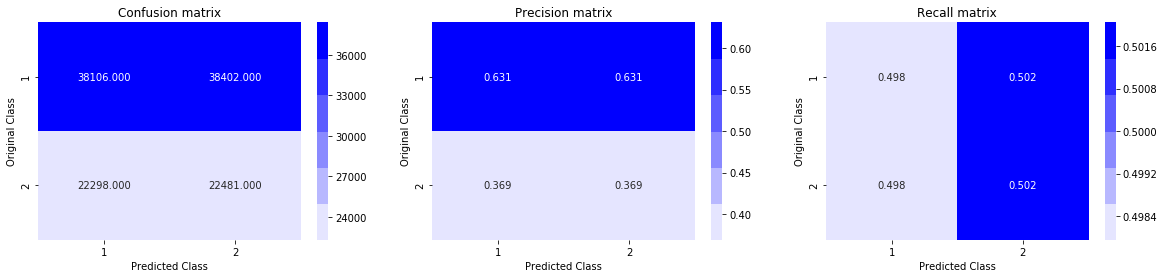

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

### 4.2 Logistic Regression with hyperparameter tuning 


For values of alpha =  1e-05 The log loss is: 0.6585278256347588
For values of alpha =  0.0001 The log loss is: 0.6585278256347588
For values of alpha =  0.001 The log loss is: 0.6585278256347588
For values of alpha =  0.01 The log loss is: 0.6585278256347588
For values of alpha =  0.1 The log loss is: 0.607728050805683
For values of alpha =  1 The log loss is: 0.6033867246972278
For values of alpha =  10 The log loss is: 0.623613752312327


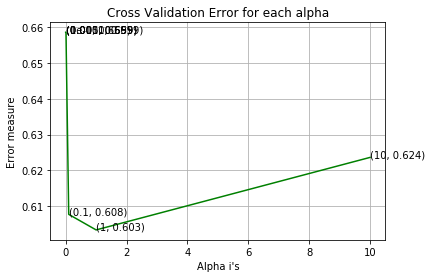

For values of best alpha =  1 The train log loss is: 0.6039211159433389
For values of best alpha =  1 The test log loss is: 0.6033867246972278
Total number of data points : 121287


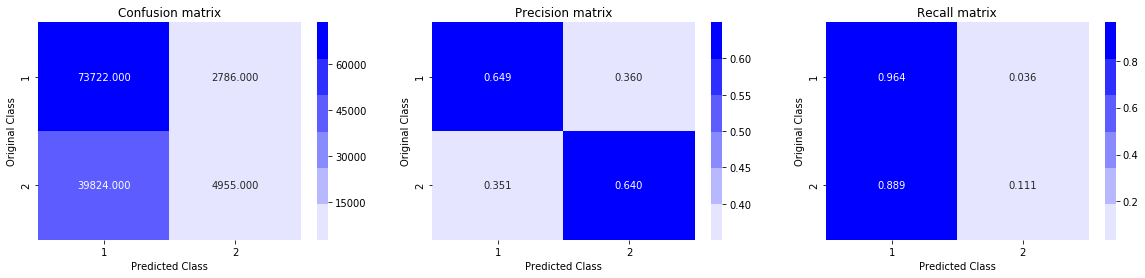

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,n_jobs=-1)
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    predict_y = sig_clf.predict_proba(X_test_tfidf)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### 4.3 Linear SVM with hyperparameter tuning 

For values of alpha =  1e-05 The log loss is: 0.6585278256347588
For values of alpha =  0.0001 The log loss is: 0.6585278256347588
For values of alpha =  0.001 The log loss is: 0.6585278256347588
For values of alpha =  0.01 The log loss is: 0.6585278256347588
For values of alpha =  0.1 The log loss is: 0.6585278256347588
For values of alpha =  1 The log loss is: 0.6062366069508072
For values of alpha =  10 The log loss is: 0.6585278256302662


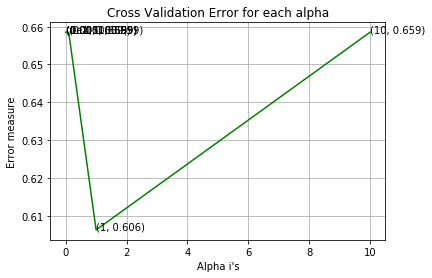

For values of best alpha =  1 The train log loss is: 0.6067287950035007
For values of best alpha =  1 The test log loss is: 0.6062366069508072
Total number of data points : 121287


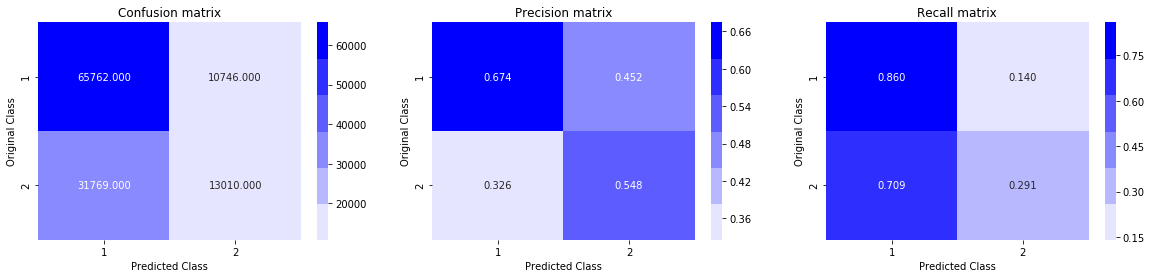

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42,n_jobs=-1)
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    predict_y = sig_clf.predict_proba(X_test_tfidf)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


### 4.4 XGBoost



In [0]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


 
tuned_parameters = {'max_depth':[2,5,7,10],'n_estimators':[10,50,100,500]}

clf_gb = XGBClassifier(objective='binary:logistic', eval_metric='logloss',n_jobs=-1)

 

#Using RandomSearchCV
model_tfidf = RandomizedSearchCV(clf_gb, tuned_parameters,verbose=5,n_jobs=10)
model_tfidf.fit(X_train_tfidf, y_train)

 

print(model_tfidf.best_estimator_)
print(model_tfidf.score(X_train_tfidf, y_train))



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  18 out of  30 | elapsed: 15.7min remaining: 10.5min
[Parallel(n_jobs=10)]: Done  25 out of  30 | elapsed: 55.8min remaining: 11.2min
[Parallel(n_jobs=10)]: Done  30 out of  30 | elapsed: 64.2min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.9055840397451617


In [0]:
print(model_tfidf.best_estimator_)
print(model_tfidf.score(X_test_tfidf, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8573218894028214


In [0]:
print('optimal max_depth:10')
print('optimal n_estimators:100')


optimal max_depth:10
optimal n_estimators:100


In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 10
params['n_estimators'] = 100

d_train = xgb.DMatrix(X_train_tfidf, label=y_train)
d_test = xgb.DMatrix(X_test_tfidf, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train_tfidf,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

[0]	train-logloss:0.68258	valid-logloss:0.682776
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.596218	valid-logloss:0.598214
[20]	train-logloss:0.534654	valid-logloss:0.53833
[30]	train-logloss:0.488967	valid-logloss:0.494187
[40]	train-logloss:0.453788	valid-logloss:0.460552
[50]	train-logloss:0.42645	valid-logloss:0.434648
[60]	train-logloss:0.404879	valid-logloss:0.414432
[70]	train-logloss:0.387611	valid-logloss:0.398371
[80]	train-logloss:0.373569	valid-logloss:0.385428
[90]	train-logloss:0.361984	valid-logloss:0.374927
[100]	train-logloss:0.352304	valid-logloss:0.366176
[110]	train-logloss:0.344578	valid-logloss:0.359211
[120]	train-logloss:0.338082	valid-logloss:0.353496
[130]	train-logloss:0.332451	valid-logloss:0.348649
[140]	train-logloss:0.327651	valid-logloss:0.344653
[150]	train-logloss:0.323642	valid-logloss:0.34136
[160]	train-logloss:0.320292	val

Total number of data points : 121287


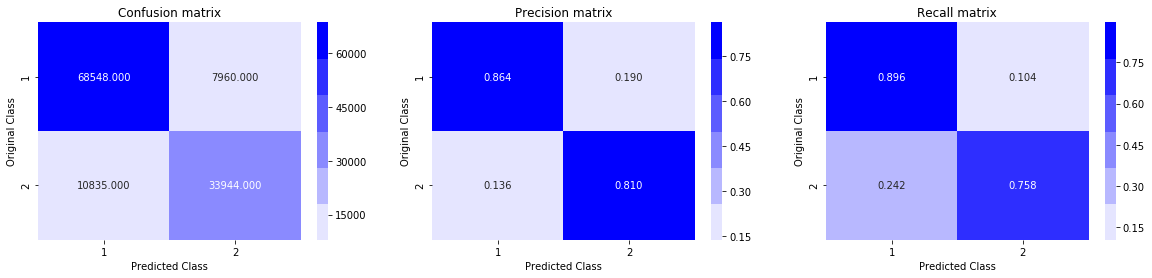

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# 5. Conclusion

In [0]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names= ("Vectorizer","Model", "Log Loss")

x.add_row(["tfidf w2v" ,"Random",  0.88871]) 
x.add_row(["tfidf w2v" ,"Logistic Regression", 0.59417]) 
x.add_row(["tfidf w2v" ,"Liner SVM", 0.65508]) 
x.add_row(["tfidf w2v" ,"GBDT", 0.33465]) 

x.add_row([" " ," ", " "]) 

x.add_row(["tfidf"  ,"Random", 0.88689]) 
x.add_row(["tfidf" ,"Logistic Regression", 0.60338 ]) 
x.add_row(["tfidf" ,"Liner SVM", 0.60623]) 
x.add_row(["tfidf" ,"GBDT", 0.31918]) 
 


print(x)


+------------+---------------------+----------+
| Vectorizer |        Model        | Log Loss |
+------------+---------------------+----------+
| tfidf w2v  |        Random       | 0.88871  |
| tfidf w2v  | Logistic Regression | 0.59417  |
| tfidf w2v  |      Liner SVM      | 0.65508  |
| tfidf w2v  |         GBDT        | 0.33465  |
|            |                     |          |
|   tfidf    |        Random       | 0.88689  |
|   tfidf    | Logistic Regression | 0.60338  |
|   tfidf    |      Liner SVM      | 0.60623  |
|   tfidf    |         GBDT        | 0.31918  |
+------------+---------------------+----------+
